In [184]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Importing Data

## Define Data Folders

In [185]:
parent_data_folder = "Y:/Downloads/tests/"
raw_test_name_1 = parent_data_folder + "Hat_1_2023-05-30_22--10--12"
raw_test_name_1 = raw_test_name_1 + ".csv"

raw_test_name_2 = parent_data_folder + "Hat_2_2023-05-30_22--10--12"
raw_test_name_2 = raw_test_name_2 + ".csv"


print(raw_test_name_1)
print(raw_test_name_2)

Y:/Downloads/tests/Hat_1_2023-05-30_22--10--12.csv
Y:/Downloads/tests/Hat_2_2023-05-30_22--10--12.csv


## Open a single file (Deprecated)

In [186]:
# Define the chunk size
chunk_size = 50000 # Modify this value based on your need

# Define the columns that you are interested in
#cols = ['column1', 'column2', 'column3'] # Change these to the columns you want

# Read the csv file in chunks
chunks = []

#for chunk in pd.read_csv('large_file.csv', chunksize=chunk_size, usecols=cols):
for chunk in pd.read_csv(raw_test_name, chunksize=chunk_size):
    # Process each chunk in here
    # You might want to filter rows or perform some transformation
    # For now, let's just append the chunk to our list
    chunks.append(chunk)

# Concatenate all chunks
data_frame = pd.concat(chunks, axis=0)


FileNotFoundError: [Errno 2] No such file or directory: 'Y:/Downloads/tests//Hat_2_2023-05-30_19--35--19.csv'

## Open and merge two DFs

In [187]:
import pandas as pd

# Define the chunk size
chunk_size = 50000 # Modify this value based on your need

# Initialize empty lists to hold the chunks from both files
chunks_file1 = []
chunks_file2 = []

# Read the first csv file in chunks
for chunk in pd.read_csv(raw_test_name_1, chunksize=chunk_size):
    chunks_file1.append(chunk)

# Read the second csv file in chunks
for chunk in pd.read_csv(raw_test_name_2, chunksize=chunk_size):
    chunks_file2.append(chunk)

# Concatenate all chunks from the first file
df1 = pd.concat(chunks_file1, axis=0)

# Concatenate all chunks from the second file
df2 = pd.concat(chunks_file2, axis=0)
df2 = df2.drop('time', axis=1)
df2 = df2.rename(columns={'value_1': 'value_3', 'value_2': 'value_4'})


# Merge the two dataframes
# Assuming that they can be merged on the index
data_frame = pd.concat([df1, df2], axis=1)

In [188]:
data_frame['time'] = pd.Series(range(len(data_frame))) / 10240
data_frame = data_frame.rename(columns={'value_1': 'HAT0_CH0', 'value_2': 'HAT0_CH1', 'value_3': 'HAT1_CH0', 'value_4': 'HAT1_CH1'})

## Creates a csv files with the combined data

In [189]:
#combined_test_name = re.sub("Hat_1", "Hat_Combined", raw_test_name_1)
#data_frame.to_csv(combined_test_name, index=False)

In [190]:
data_frame.head()

,time,HAT0_CH0,HAT0_CH1,HAT1_CH0,HAT1_CH1
0,0.000000,5.112546,1.077009,5.117823,0.901965
1,0.000098,4.646385,1.131949,-0.965384,0.848068
2,0.000195,3.160381,1.073657,-0.330914,0.807408
3,0.000293,-0.848631,1.039250,-3.843085,0.764990
4,0.000391,5.112546,0.991722,-0.227772,0.724115


In [191]:
print(data_frame)

                 time  HAT0_CH0  HAT0_CH1  HAT1_CH0  HAT1_CH1
0            0.000000  5.112546  1.077009  5.117823  0.901965
1            0.000098  4.646385  1.131949 -0.965384  0.848068
2            0.000195  3.160381  1.073657 -0.330914  0.807408
3            0.000293 -0.848631  1.039250 -3.843085  0.764990
4            0.000391  5.112546  0.991722 -0.227772  0.724115
...               ...       ...       ...       ...       ...
27083422  2644.865430 -0.003666  0.001354       NaN       NaN
27083423  2644.865527 -0.006689  0.001158       NaN       NaN
27083424  2644.865625 -0.007539  0.000788       NaN       NaN
27083425  2644.865723 -0.008601  0.001229       NaN       NaN
27083426  2644.865820 -0.008813       NaN       NaN       NaN

[27083427 rows x 5 columns]


## Shape into Dataframe

# Meta Validation

### Maximum, minimums and average

In [192]:
# Calculate the maximum, minimum, and average values
max_values = data_frame.max()
min_values = data_frame.min()
average_values = data_frame.mean()

# Create a DataFrame with the results
stats_df = pd.DataFrame({'Maximum': max_values, 'Minimum': min_values, 'Average': average_values})

# Round the values to 1 decimal place
stats_df_rounded = stats_df.round(1)

# Display the results in a tabular format
print(stats_df_rounded)

# Note: values of 0.0 indicate that - most likely - the channel was not used

          Maximum  Minimum  Average
time       2644.9      0.0   1322.4
HAT0_CH0      5.1     -5.1      0.0
HAT0_CH1      1.1     -0.0      0.0
HAT1_CH0      5.1     -5.1      0.0
HAT1_CH1      8.7     -0.0     -0.0


### Data Points & Recording Time

In [193]:
# Access the first column using its index and count the number of data points
#time_values = data_frame.iloc[:, 0]
time_values = data_frame["time"]
data_points_count = time_values.count()

# Workaround to account for files that don't start at 0 seconds
initial_recording_time = time_values.iloc[0]
final_recording_time = time_values.iloc[-1]
delta_recording_time = final_recording_time - initial_recording_time

print("Number of data points in the first column:", data_points_count)
print("Data was recorded for", round(delta_recording_time,2), "seconds")
print("Data was recorded for", round(delta_recording_time/60,2), "minutes")
print("Data was recorded for", round(delta_recording_time/3600,2), "hours")

Number of data points in the first column: 27083427
Data was recorded for 2644.87 seconds
Data was recorded for 44.08 minutes
Data was recorded for 0.73 hours


### Sampling rate, Consistency and CV

In [194]:
# Calculate the time differences between consecutive data points
time_differences = time_values.diff().dropna()

# Define the expected sampling rate (in Hz) and maximum allowed deviation (in percentage)
expected_sampling_rate = 10240  # Replace with your expected sampling rate
max_allowed_deviation = 0.05  # 5% deviation, for example

# Calculate the expected time difference between consecutive data points
expected_time_difference = 1 / expected_sampling_rate

# Calculate the deviation of each time difference from the expected time difference
deviation = np.abs(time_differences - expected_time_difference)

# Count the number of time intervals that exceed the maximum allowed deviation
exceed_threshold_count = np.sum(deviation > max_allowed_deviation * expected_time_difference)

# Calculate the percentage of time intervals that exceed the maximum allowed deviation
exceed_threshold_percentage = exceed_threshold_count / len(time_differences) * 100

# Calculate the effective sampling rate
effective_sampling_rate = 1 / time_differences.mean()

print(f"Expected sampling rate: {expected_sampling_rate} Hz")
print(f"Effective sampling rate: {effective_sampling_rate:.2f} Hz")
print(f"Number of time intervals exceeding {max_allowed_deviation * 100}% deviation: {exceed_threshold_count}")
print(f"Percentage of time intervals exceeding {max_allowed_deviation * 100}% deviation: {exceed_threshold_percentage:.2f}%")

Expected sampling rate: 10240 Hz
Effective sampling rate: 10240.00 Hz
Number of time intervals exceeding 5.0% deviation: 0
Percentage of time intervals exceeding 5.0% deviation: 0.00%


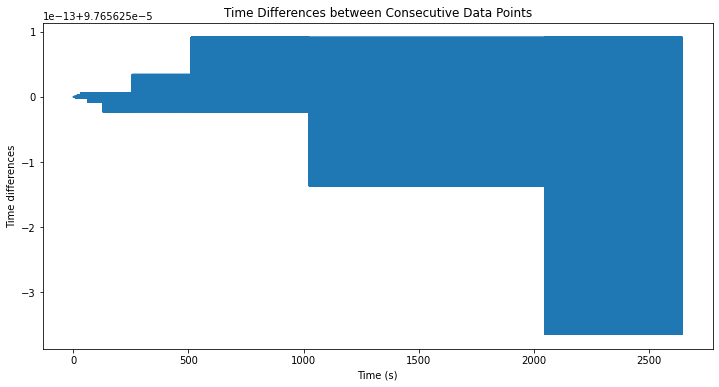

In [195]:
import matplotlib.pyplot as plt

# Remove the first value from time_values to match the length of time_differences
adjusted_time_values = time_values.iloc[1:]

plt.figure(figsize=(12, 6))
plt.plot(adjusted_time_values, time_differences)
plt.xlabel("Time (s)")
plt.ylabel("Time differences")
plt.title("Time Differences between Consecutive Data Points")
plt.show()

In [196]:
# Calculate the duration in seconds
start_time = data_frame.iloc[0, 0]
end_time = data_frame.iloc[-1, 0]
duration_seconds = end_time - start_time

# Get the file size in bytes
file_size_bytes = os.path.getsize(raw_test_name_1)*2

# Convert file size to megabytes
file_size_mb = file_size_bytes / (1024 * 1024)

# Calculate disk space per second in megabytes
disk_space_per_second_mb = file_size_mb / duration_seconds

print(f"Disk space per second: {round(disk_space_per_second_mb,2)} MB/s")

print(f"Disk space per minute: {round(disk_space_per_second_mb*60,2)} MB/min")

print(f"Disk space per hour: {round(disk_space_per_second_mb*60*60/1024,2)} GB/hour")

Disk space per second: 1.22 MB/s
Disk space per minute: 73.27 MB/min
Disk space per hour: 4.29 GB/hour


# Signal

Plots a single channel against time. Note: To plot a full test length takes a significant amount of time

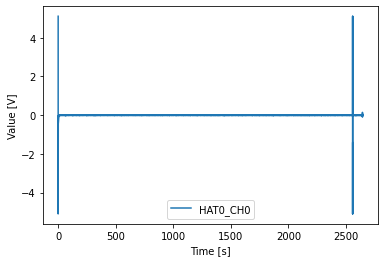

In [198]:
device_data = data_frame[["HAT0_CH0"]]

# Plot the first three columns with time_values as the x-axis
for column in device_data.columns:
    plt.plot(data_frame['time'], device_data[column], label=column)

#plt.xlim((1, 14))
#plt.ylim((-10, 11))

# Customize the plot
plt.xlabel('Time [s]')
plt.ylabel('Value [V]')
#plt.title('D1 Ch 0 - 2')
plt.legend(device_data.columns, loc='best')

# Show the plot
plt.show()


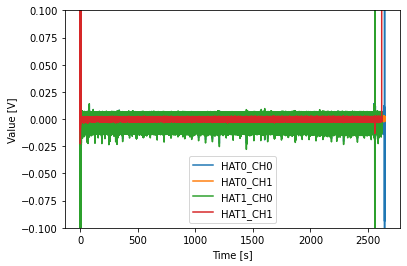

In [200]:
device_data = data_frame[["HAT0_CH0", "HAT0_CH1", "HAT1_CH0", "HAT1_CH1"]]

# Plot the first three columns with time_values as the x-axis
for column in device_data.columns:
    plt.plot(data_frame['time'], device_data[column], label=column)

#plt.xlim((90, 115))
plt.ylim((-0.1, 0.1))

# Customize the plot
plt.xlabel('Time [s]')
plt.ylabel('Value [V]')
#plt.title('D1 Ch 0 - 2')
plt.legend(device_data.columns, loc='best')

# Show the plot
plt.show()


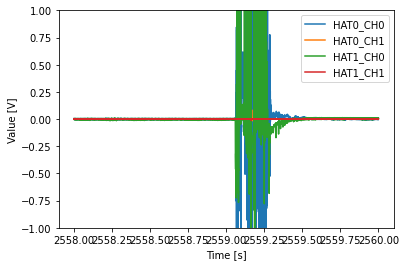

: 

In [220]:
def plot_data(data_frame, start=None, end=None):
    # Slice the data if start and end are provided
    if start is not None and end is not None:
        data_frame = data_frame[(data_frame['time'] >= start) & (data_frame['time'] <= end)]
    
    device_data = data_frame[["HAT0_CH0", "HAT0_CH1", "HAT1_CH0", "HAT1_CH1"]]

    # Plot the first three columns with time_values as the x-axis
    for column in device_data.columns:
        plt.plot(data_frame['time'], device_data[column], label=column)

    #plt.xlim((90, 115))
    plt.ylim((-1.0, 1.0))

    # Customize the plot
    plt.xlabel('Time [s]')
    plt.ylabel('Value [V]')
    #plt.title('D1 Ch 0 - 2')
    plt.legend(device_data.columns, loc='best')

    # Show the plot
    plt.show()

# You can call this function with start and end times like this:
plot_data(data_frame, start=2558, end=2560)
